# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [7]:
#Imports:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [8]:
#Importing ACT and SAT Data sets
sat_df = pd.read_csv('../DSI_Project1/sat_2017.csv')
act_df = pd.read_csv('../DSI_Project1/act_2017.csv')


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [9]:
#Printing the first 10 rows of SAT dataframe
sat_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [10]:
#Printing the first 10 rows of ACT dataframe
act_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [11]:
#Using .describe to get an overview of the data for SAT
sat_df.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [12]:
#Using .describe to get an overview of the data for ACT
act_df.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: For ACT we are looking at a data set that includes each of the 50 states in the US (plus DC and National average), each state's participation in the ACT, their average scores for each category, and their average total.

For SAT we are looking at a data set that includes each of the 50 states in the US (plus DC), each state's participation in the ACT, their average scores for each category, and their average total.

#### 4a. Does the data look complete? 

Answer: Yes. There are no Null values. Each row and column is complete with data

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: The ACT is scored between 1 and 36. Maryland ACT Science score is listed as 2.3. Based on the data source, this should be 23.2

The STA is scored between 200 and 600. The Maryland SAT Math score is listed as 52. Based on the data source, this should be 524. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [13]:
# Locating index for incorrect value
act_df[act_df['Science'] == 2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [14]:
#Correcting value
act_df.loc[21, 'Science'] = 23.2 

In [15]:
#locating index for incorrect value
sat_df[sat_df['Math'] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [16]:
#fixing incorrect value
sat_df.loc[20, 'Math'] = 524

#### 5. What are your data types? 
Display the data types of each feature. 

In [17]:
#Displaying the data types for ACT df
act_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [18]:
#Displaying the data types for SAT df
sat_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The only notable types that stand out to me are that composite for the ACT df is listed an an object. Since it is the same as the other columns (english math, reading and science) it should be a float as well. 

The SAT df particitpation column is also listed as an object, although it is a percentage and ought to be a float or int if we want to do numerical analysis with that column.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [19]:
# Creating a function that will convert participation rates to an appropriate numeric type and remove the %
# Code adapted from Ryan Leyba
def change_type(x):
    x = float(x.strip('%'))
    return x

# Calling the function on the act_df using .map to iterate through the whole column
act_df['Participation'] = act_df['Participation'].map(change_type)

In [20]:
#calling the df with .head() to confirm the changes

act_df.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [21]:
# Calling the function on the sat_df using .map to iterate through the whole column

sat_df['Participation'] = sat_df['Participation'].map(change_type)

In [22]:
#calling the df with .head() to confirm the changes
sat_df.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [23]:
#Calling dtypes to make sure they have been appropriately changed
act_df.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [24]:
#Calling dtypes to make sure they have been appropriately changed
sat_df.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [25]:
# Converting all column names to lowercase:
sat_df.columns = sat_df.columns.str.lower()

act_df.columns = act_df.columns.str.lower()

#Renaming SAT df columns with unique and informative names:
sat_df.rename(columns={'participation': 'sat_part_17',
                      'evidence-based reading and writing': 'sat_rw_17',
                      'math': 'sat_math_17',
                      'total': 'sat_total_17'}, 
              inplace=True)

#Renaming ACT df columns with unique and informative names:
act_df.rename(columns={'participation': 'act_part_17',
                      'english': 'act_english_17',
                      'math': 'act_math_17',
                      'reading': 'act_reading_17',
                      'science': 'act_science_17',
                      'composite': 'act_composite_17'}, 
              inplace=True)
sat_df.head()

,state,sat_part_17,sat_rw_17,sat_math_17,sat_total_17
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [26]:
act_df.head()

,state,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [27]:
#Dropped the National Average row with act_df.drop([0], inplace=True)
act_df.head()

,state,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [28]:
# Combining the act and sat df using the pd.merge method
combined_2017 = pd.merge(act_df, sat_df, on='state', how='outer')

# Calling the new df with .head() to see if it worked
combined_2017.head()

,state,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_part_17,sat_rw_17,sat_math_17,sat_total_17
0,National,60.0,20.3,20.7,21.4,21.0,21.0,NaN,NaN,NaN,NaN
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
#saving and exporting combined_2017.csv
combined_2017.to_csv('../DSI_Project1/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [30]:
# Importing 2018 ACT and SAT data
# data provided by Stephen from the link in the the README
sat18_df = pd.read_csv('../DSI_Project1/SAT_2018.csv')
act18_df = pd.read_csv('../DSI_Project1/ACT_2018.csv')

# # Calling the new df with .head() to see if it worked
act18_df.head()

,state,act_part_18,act_comp_18
0,Alabama,100,19.1
1,Arkansas,100,19.4
2,Kentucky,100,20.2
3,Louisiana,100,19.2
4,Mississippi,100,18.6


In [31]:
# Calling the new df with .head() to see if it worked
sat18_df.head()

,state,sat_part_18,sat_total_18
0,Arkansas,5,1169
1,California,60,1076
2,Colorado,100,1025
3,Connecticut,100,1053
4,Delaware,100,998


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [32]:
#Combining ACT and SAT df for 2018 info
combined_2018 = pd.merge(act18_df, sat18_df, on='state', how='outer')

In [33]:
# Combining 2018 and 2017 df
final = pd.merge(combined_2018, combined_2017, on='state', how='outer')

In [39]:
# calling.head() to make sure merge worked
final.head()

,state,act_part_18,act_comp_18,sat_part_18,sat_total_18,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_part_17,sat_rw_17,sat_math_17,sat_total_17
0,Alabama,100.0,19.1,NaN,NaN,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
1,Arkansas,100.0,19.4,5.0,1169.0,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
2,Kentucky,100.0,20.2,4.0,1248.0,100.0,19.6,19.4,20.5,20.1,20.0,4.0,631.0,616.0,1247.0
3,Louisiana,100.0,19.2,4.0,1210.0,100.0,19.4,18.8,19.8,19.6,19.5,4.0,611.0,586.0,1198.0
4,Mississippi,100.0,18.6,3.0,1236.0,100.0,18.2,18.1,18.8,18.8,18.6,2.0,634.0,607.0,1242.0


In [40]:
final.to_csv('../DSI_Project1/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [35]:
# Calling describe so sum up data and calling transpose to make it more readable.
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_part_18,51.0,61.686275,34.035564,7.0,28.500,66.00,100.000,100.0
act_comp_18,51.0,21.498039,2.117686,17.7,19.950,21.30,23.650,25.6
sat_part_18,48.0,47.916667,38.647250,2.0,4.000,55.50,80.500,100.0
sat_total_18,48.0,1123.687500,96.521446,977.0,1059.750,1096.00,1230.250,1298.0
act_part_17,52.0,65.153846,31.832518,8.0,31.000,68.00,100.000,100.0
act_english_17,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
act_math_17,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
act_reading_17,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
act_science_17,52.0,21.442308,1.723351,18.2,19.975,21.30,23.200,24.9
sat_part_17,51.0,39.803922,35.276632,2.0,4.000,38.00,66.000,100.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [36]:
# defining a function to calculate standard deviation
def std_dev():

SyntaxError: unexpected EOF while parsing (<ipython-input-36-9803d8853dc4>, line 2)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [ ]:
#Code:


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [ ]:
#code
final.head()

In [ ]:
#Maximum ACT participation percentage for 2017
final[final['act_part_17'] == final['act_part_17'].max()]['state'].head()

In [ ]:
#Maximum ACT participation percentage for 2018
final[final['act_part_18'] == final['act_part_18'].max()]['state'].head()

In [ ]:
#Maximum SAT participation percentage for 2017
final[final['sat_part_17'] == final['sat_part_17'].max()]['state'].head()

In [ ]:
#Maximum SAT participation percentage for 2018
final[final['sat_part_18'] == final['sat_part_17'].max()]['state'].head()

In [ ]:
#Maximum ACT composite score  for 2017
final[final['act_composite_17'] == final['act_composite_17'].max()]['state'].head()

In [ ]:
#Maximum ACT composite score  for 2018
final[final['act_comp_18'] == final['act_comp_18'].max()]['state']

In [ ]:
#Maximum SAT total score  for 2017
final[final['sat_total_17'] == final['sat_total_17'].max()]['state']

In [ ]:
#Maximum SAT total score  for 2018
final[final['sat_total_18'] == final['sat_total_18'].max()]['state']

In [ ]:
#Minimum ACT participation percentage for 2017
final[final['act_part_17'] == final['act_part_17'].min()]['state']

In [ ]:
#Minimum ACT participation percentage for 2018
final[final['act_part_18'] == final['act_part_18'].min()]['state']

In [ ]:
#Minimum SAT participation percentage for 2017
final[final['sat_part_17'] == final['sat_part_17'].min()]['state']

In [ ]:
#Minimum SAT participation percentage for 2018
final[final['sat_part_18'] == final['sat_part_18'].min()]['state']

In [ ]:
#Minimum SAT total score  for 2017
final[final['sat_total_17'] == final['sat_total_17'].min()]['state']

In [ ]:
#Minimum SAT total score  for 2018
final[final['sat_total_18'] == final['sat_total_18'].min()]['state']

In [ ]:
#Minimum ACT composite score  for 2018
final[final['act_composite_17'] == final['act_composite_17'].min()]['state']

In [ ]:
#Minimum ACT composite score  for 2018
final[final['act_comp_18'] == final['act_comp_18'].min()]['state']

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

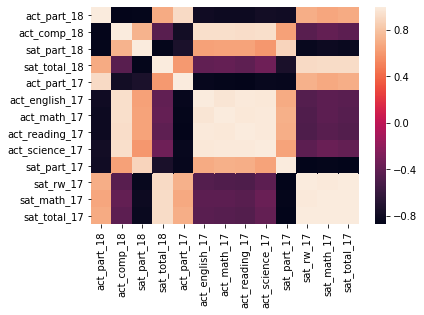

In [38]:
sns.heatmap(final.corr())

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [ ]:
# Code

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [ ]:
# Code

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [ ]:
# Code

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [ ]:
# Based on the information we collectively learned about the data, I would conclude a few things:

#Conclusions
# 1. It would appear that many states are either ACT heavy, or SAT heavy and much of this is due to state 
#    requirements making it a prerequisite for students to take one test or the other.
# 2. States that required one test over the other, had a small population of students taking both tests
#    and in those instances students tended to perform high on both tests indicating that the same high peforming
#    students were the ones taking both tests.
# 3. As the participation rates for a given test increased, the average score also tended to decrease towards
#    a more noirmal distribution.

#Recommendations
# 1. Many of the states require one test instead of the other, so if we wanted to increase participation 
#    for the SAT in states where they require the ACT it would require lobbying local governing boards to 
#    make the transition from ACT to SAT
# 2. Another factor(s) for some students may be the cost of taking the test and the availability of testing 
#    facilities near by. If we made decreased the barrier for entry of some of these factors, we could then
#    potentially increase the participation in the SAT
# 3. Additional information may be requeired and we should push for further research on the impact that taking
#    the SAT and the quality of your score has on whether or not you get in to the college you want. 

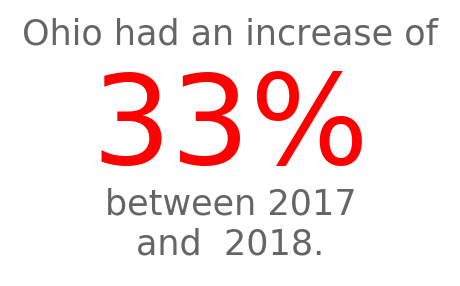

In [5]:
#adapted from 2.03-lesson-principles_of_data_visualization code
# Creating visual for presentation

plt.figure(figsize=(8, 5))

plt.text(x = 0.5,
         y = 0.9,
         s = 'Ohio had an increase of', 
         ha = 'center',                       
         va = 'center',                        
         size = 35,                            
         alpha = 0.6)                          

plt.text(x = 0.5,
         y = 0.55,
         s = '33%',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1,
         color = 'red')

plt.text(x = 0.5,
         y = 0.2,
         s = 'between 2017\nand  2018.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

plt.axis('off');

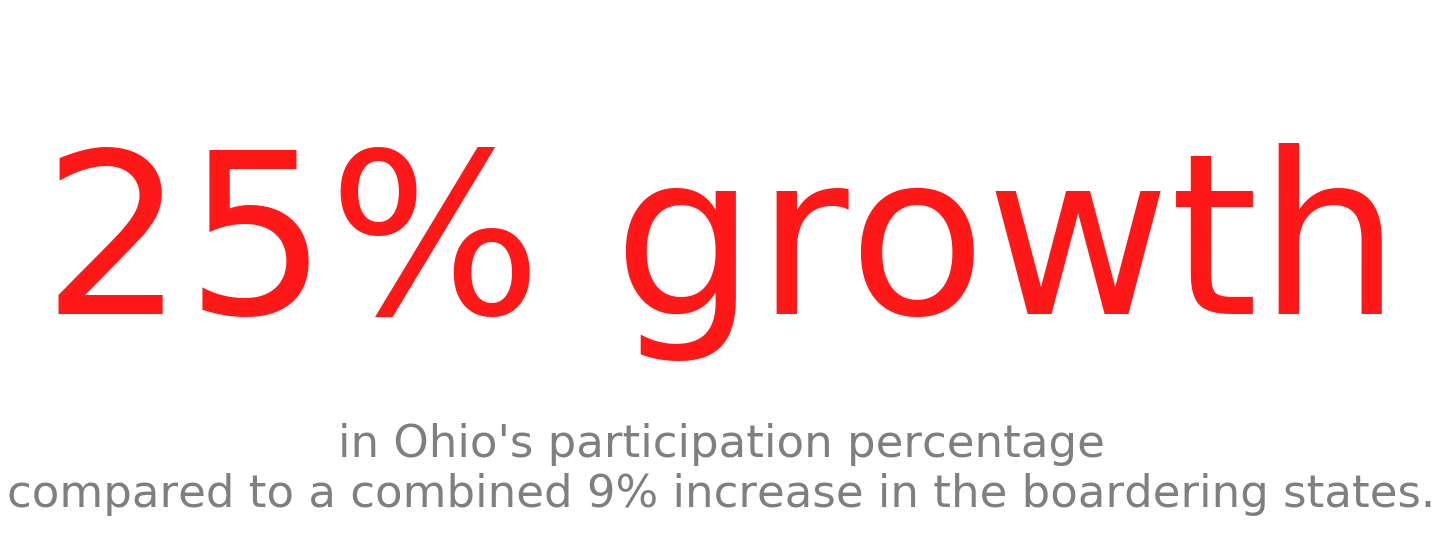

In [4]:
#adapted from 2.03-lesson-principles_of_data_visualization code
# Creating visual for presentation
plt.figure(figsize=(10, 10))

plt.text(x = 0.5,
         y = 0.55,
         s = '25% growth',
         ha = 'center',
         va = 'center',
         size = 225,
         alpha = 0.9,
        color = 'red')

plt.text(x = 0.5,
         y = 0.15,
         s = "in Ohio's participation percentage\ncompared to a combined 9% increase in the boardering states.",
         ha = 'center',
         va = 'center',
         size = 45,
         alpha = 0.5)

plt.axis('off');